*1125 파이썬 머신러닝 완벽가이드 p.449~p.463*

*ch7. 3~4*

## 03. 평균 이동

### 평균 이동(Mean Shift)의 개요

- 평균 이동(Mean Shift)
    - K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행.
    - 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴(K-평균은 중심에 소속된 데이터의 평균 거리 중심으로 이동)
    - 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정
    - 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)를 이용
    - 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동

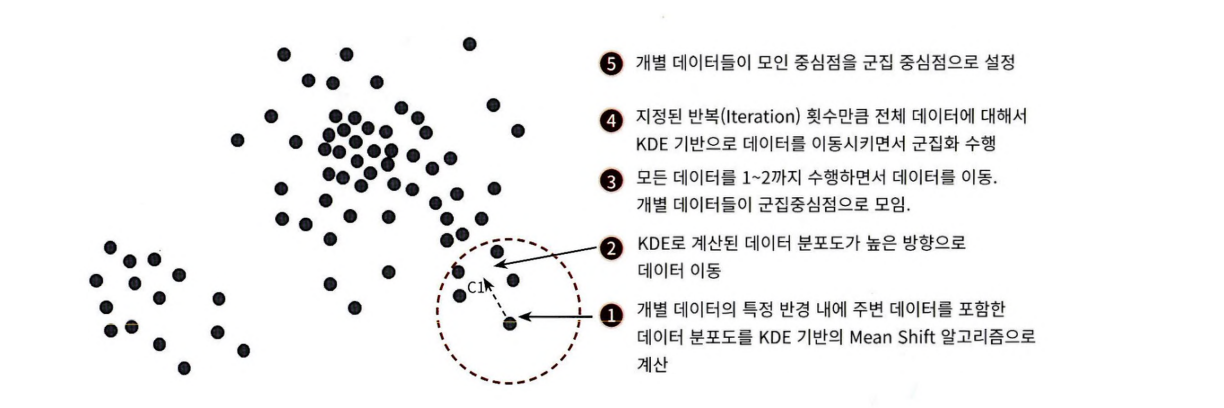

- KDE(Kernel Density Estimation)
    - 커널(Kern이) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
    - 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정
    - 대표적인 커널 함수로 가우시안 분포 함수가 사용됨

- 확률 밀도 함수 PDF(Probability Density Function)
    - 확률 변수의 분포를 나타내는 함수 (정규분포 함수, 감마 분포, t-분포 등)

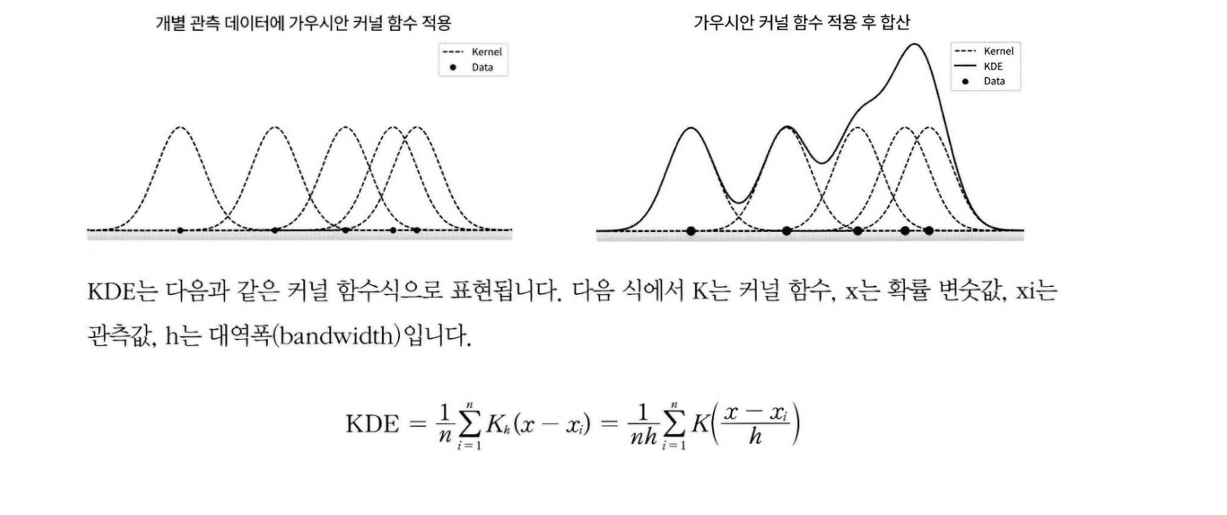

- 대역폭 h
    - KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용
    - 작은 h 값(h=1.0)은 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합하기 쉬움.
    - 큰 h 값(h=10)은 과도하게 평활화된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하므로 과소적합하기 쉬움.


**<h 값을 증가시키면서 변화되는 KDE>**

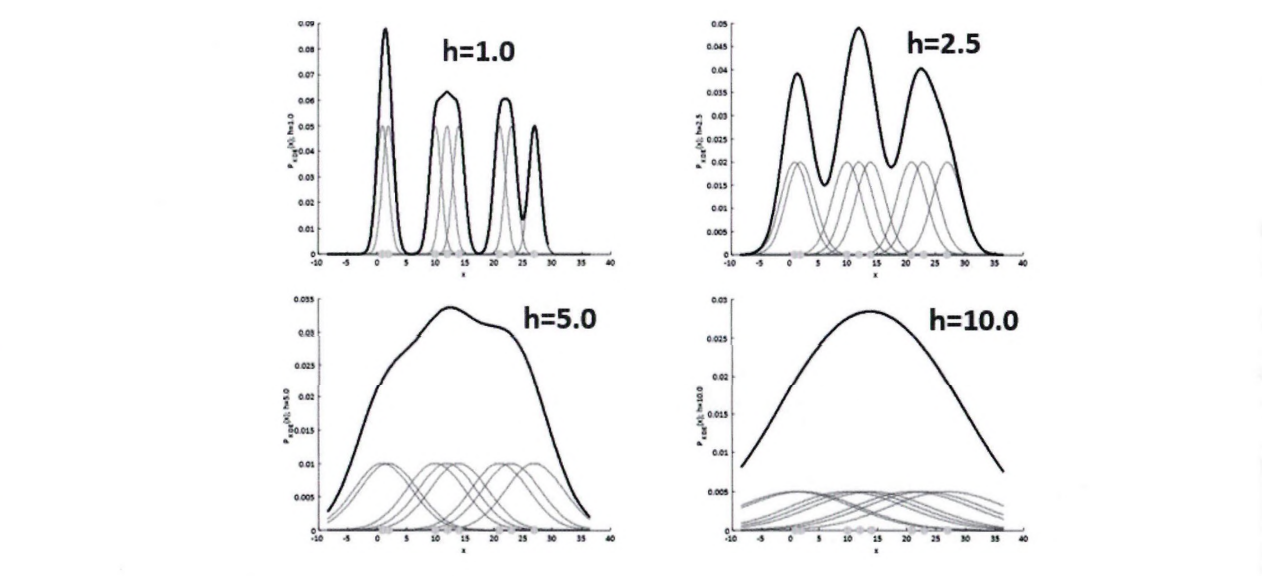

- 평균 이동 군집화
    - 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가짐.
    - 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행.

- 사이킷런은 평균 이동 군집화를 위해 **MeanShift 클래스**를 제공.
    - MeanShift 클래스의 가장 중요한 초기화 파라미터: bandwidth (KDE의 대역폭 h와 동일)
    - 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치기 때문에 사이킷런은 최적의 대역폭 계산을 위해 **estimate_bandwidth()** 함수를 제공

In [1]:
# 평균 이동 군집화 알고리즘을 적용
# make_blobs()의 cluster_std를 0.7로 정한 3개 군집의 데이터에 대해 bandwidth를 0.8로 설정

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


    -> 군집이 0부터 5까지 6개로 분류됐으며, 지나치게 세분화돼 군집화됨.

    일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아짐

In [2]:
# bandwidth를 살짝 높인 1.0으로 해서 MeanShift 수행

meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


    -> 3개의 군집으로 잘 군집화됨. 데이터의 분포 유형에 따라 bandwidth 값의 변화는 군집화 개수에 큰 영향을 미칠 수 있음.

    따라서 MeanShift에서는 이 bandwidth를 최적화 값으로 설정하는 것이 매우 중요!

In [3]:
# 최적화된 bandwidth 값을 찾기 위해서 estimate_bandwidth( )함수를 제공.
# estimate_bandwidth()의 파라미터로 피처 데이터 세트를 입력해주면 최적화된 bandwidth 값을 반환해줌.

from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwith 값:', round(bandwidth, 3))

bandwith 값: 1.816


In [4]:
# estimate_bandwidth( )로 측정된 bandwidth를 평균 이동 입력값으로 적용해 동일한 make_blobs() 데이터 세트에 군집화 수행

import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 값 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


    -> 3개의 군집으로 구성됨

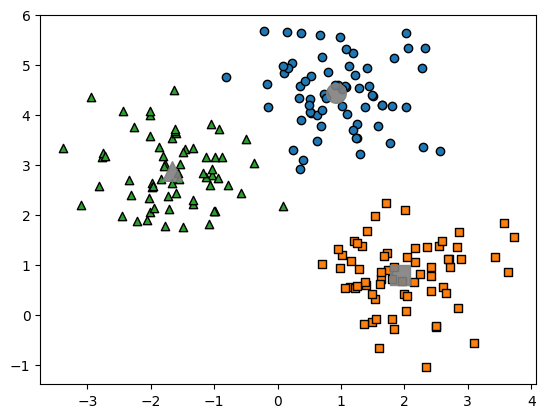

In [6]:
# 구성된 3개의 군집 시각화

import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
# cluster_centers_ 속성으로 군집 중심 좌표 표시
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]

    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray',alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', marker=''%label)

plt.show()

In [7]:
# target 값과 군집 label 값 비교
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


    -> Target 값과 군집 label 값이 1:1로 잘 매칭됨

- 평균 이동의 장점
    - 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않음 -> 때문에 좀 더 유연한 군집화가 가능
    - 이상치의 영향력도 크지 않으며, 미리 군집의 개수를 정할 필요도 없음

- 평균 이동의 단점
    - 알고리즘의 수행 시간이 오래 걸림
    - bandwidth의 크기에 따른 군집화 영향도가 매우 큼

=> 일반적으로 평균 이동 군집화 기법은 분석 업무 기반의 데이터 세트보다는 컴퓨터
비전 영역에서 더 많이 사용됨.  
=> 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할을 수행하는 알고리즘

---

## 04. GMM(Gaussian Mixture Model)

### GMM(Gaussian Mixture Model) 소개

- GMM 군집화
    - 군집화를 적용하고자 하는 데이터가 **여러 개의 가우시안 분포(GaussianDistribution)를 가진 데이터 집합들이 섞여서 생성된 것**이라는 가정하에 군집화를 수행하는 방식
    - 정규 분포(Normal distribution)로도 알려진 가우시안 분포는 좌우 대칭형의 종(Bell) 형태를 가진 연속 확률 함수

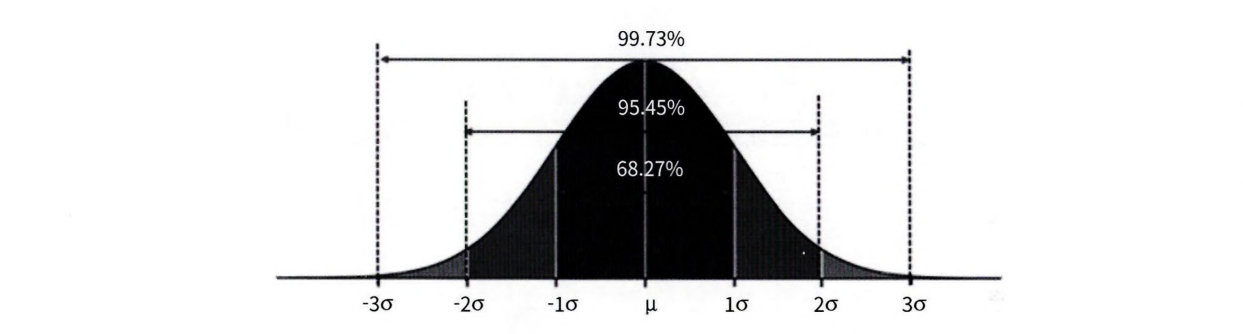

- 정규 분포: 평균을 중심으로 높은 데이터 분포도를 가지고 있으며, 좌우 표준편차 1에 전체 데이터의 68.27%, 좌우 표준편차 2에 전체 데이터의 95.45%를 가지고 있음.
- 표준 정규 분포: 평균이 0이고, 표준편차가 1인 정규 분포

---

**<세 개의 가우시안 분포 A, B, C를 가진 데이터 세트가 있다고 가정>**

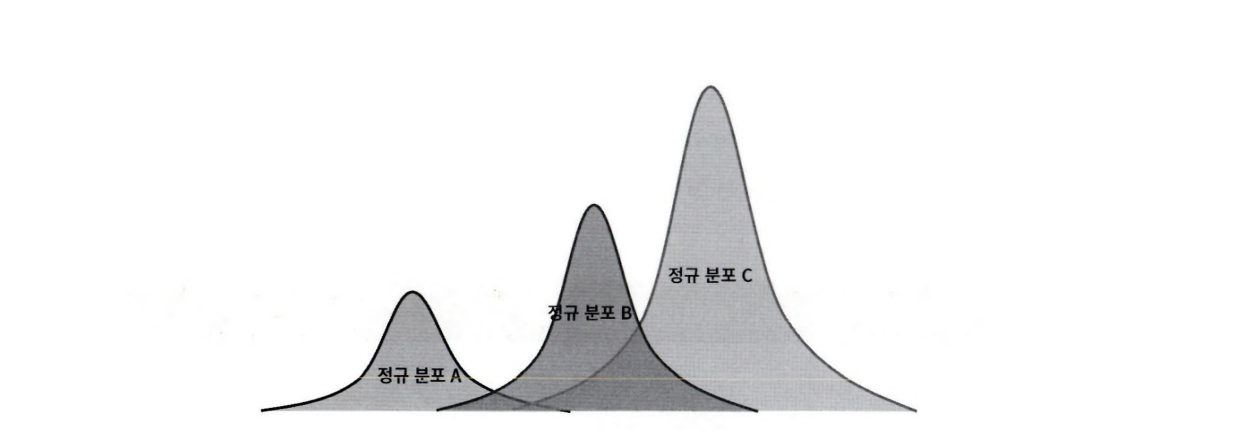

**<세 개의 정규 분포를 합치면 다음 형태>**

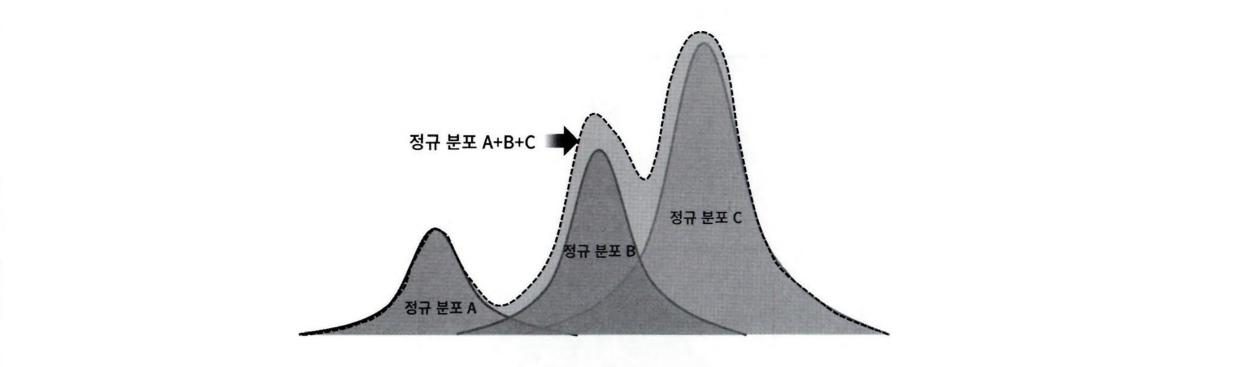

- 군집화를 수행하려는 실제 데이터 세트의 데이터 분포도가 다음과 같다면 쉽게 이 데이터 세트가 정규 분포 A, B, C가 합쳐서 된 데이터 분포도임을 알 수 있음.

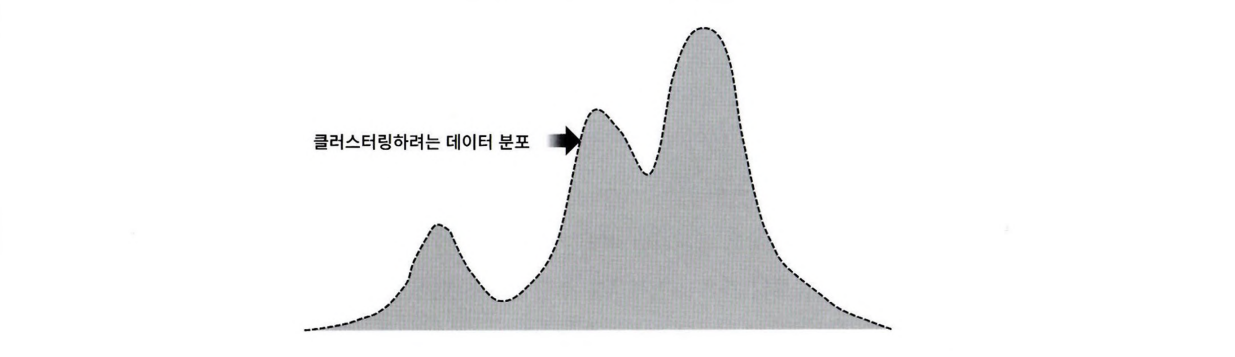

- 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화을 수행하는 것이 GMM 군집화 방식.
- 가령 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식

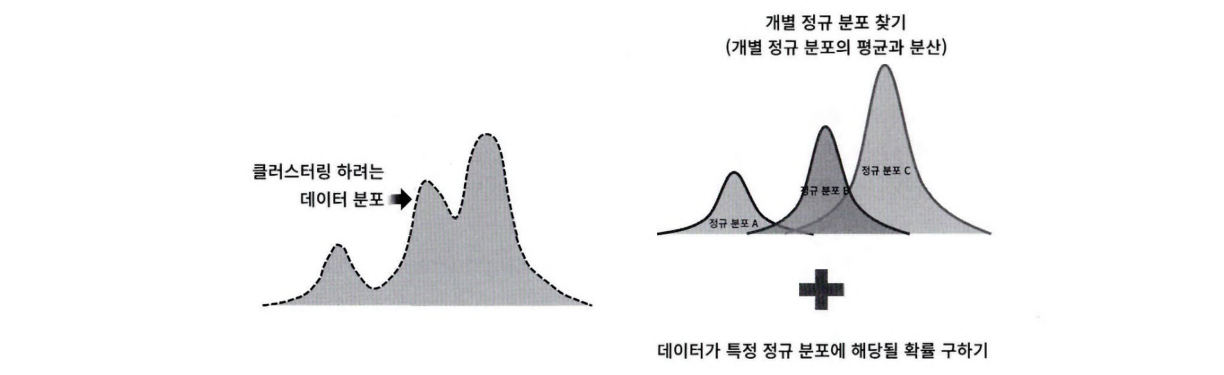

- 이와 같은 방식은 GMM에서는 모수 추정이라고 함
- 모수 추정
    - 개별 정규 분포의 평균과 분산
    - 각 데이터가 어떤 정규 분포에 해당되는지의 확률

=> 이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용.  
=> 사이킷런은 이러한 GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기 위해 **GaussianMixture 클래스**를 지원

---

### GMM을 이용한 붓꽃 데이터 세트 군집화

- GMM: 확률 기반 군집화 / K-평균: 거리 기반 군집화
- 붓꽃 데이터 세트로 이 두 가지 방식을 이용해 군집화를 수행한 뒤 양쪽 방식을 비교해보자

In [9]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# Dataframe으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

- GaussianMixture 객체의 가장 중요한 초기화파라미터: n_components
    - n_components: gaussian mixture의 모델의 총 개수. (K-평균의 n_clusters와 같이 군집의 개수를 정하는 데 중요한 역할을 수행함)

In [10]:
# n_components를 3으로 설정하고 GaussianMixture로 군집화 수행

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels

# target 값에 따라 gmm_cluster 값이 어떻게 매핑되었는지 확인
iris_result = irisDF.groupby('target')['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


    -> Target 0은 cluster 0으로, Target 2는 cluster 1로 모두 잘 매핑됨.
    -> Target 1만 cluster 0으로 45개(90%), cluster 2로 5개(10%) 매핑됨.
    -> 앞 절의 붓꽃 데이터 세트의 K-평균 군집화 결과보다 더 효과적인 분류 결과가 도출됨

In [11]:
# K-평균 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby('target')['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


    -> 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이다.
    
    K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식.
    개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화 수행 가능

### GMM과 K—평균의 비교

- KMeans
    - 원형의 범위에서 군집화 수행
    - 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율 상승
    - 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못함

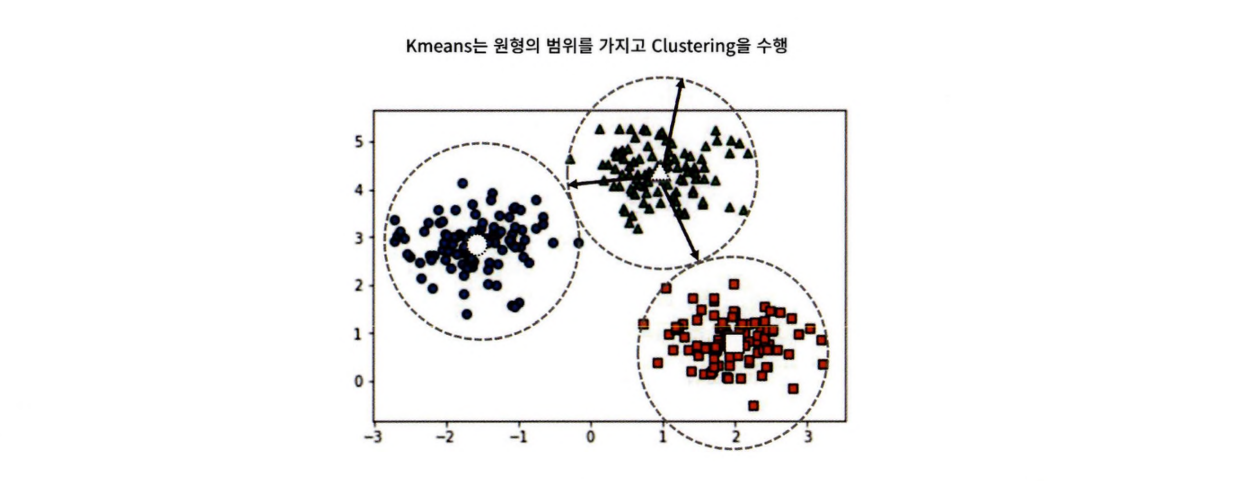

---

군집 시각화를 위한 별도의 함수 **visualize_cluster_plot** 생성
- 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화함.

**<visualize_cluster_plot의 인자>**

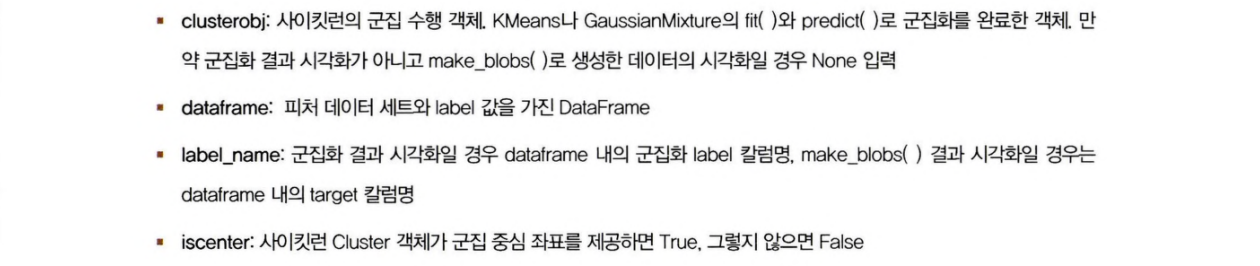

In [12]:
## 군집 시각화 함수 정의
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

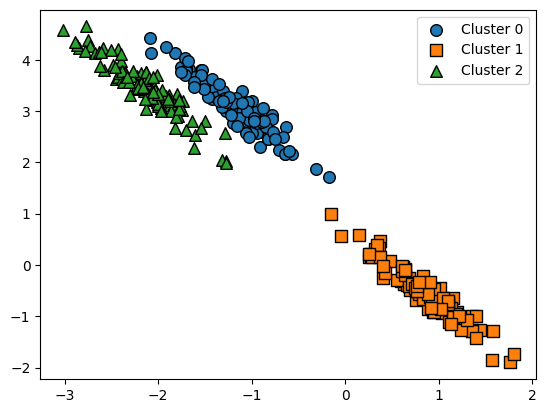

In [13]:
from sklearn.datasets import make_blobs

#  make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

     -> 위와 같이 만들어진 데이터 세트에서는 KMeans의 군집화 정확성이 떨어짐.

<ipython-input-12-c2c620be42e6>:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


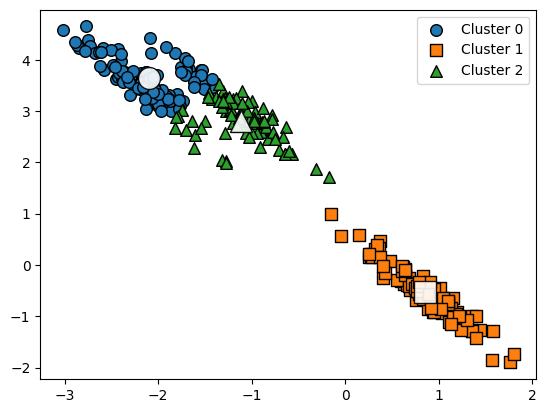

In [16]:
# 위의 데이터셋에 KMeans 군집화 수행(n_clusters=3)
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
from sklearn.cluster import KMeans

kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

- KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음.
- KMeans가 평균 거리 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성하면서 위와 같이 길쭉한 방향으로 데이터가 밀접해 있을 경우에는 최적의 군집화가 어려움

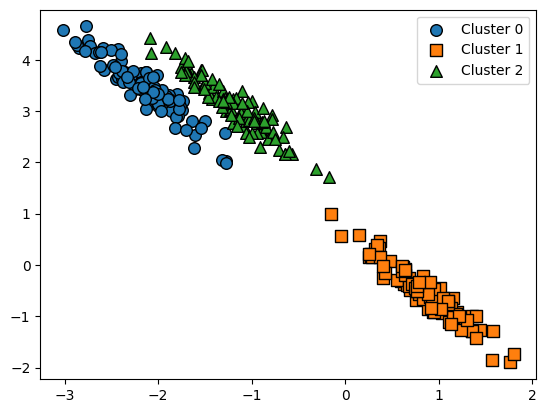

In [17]:
# GMM으로 군집화 수행
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

#시각화, GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter=False
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

    -> 데이터가 분포된 방향에 따라 정확하게 군집화됨
    -> GMM은 K-평균과 다르게 군집의 중심 좌표를 구할 수 없어서 군집 중심 표현이 visualize_cluster_plot( )에서 시각화되지X

In [18]:
# make_blobs()의 target 값과 KMeans, GMM의 군집 Label 값 비교
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('### GMM Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64
### GMM Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


    -> KMeans: 군집 1번만 정확히 매핑, 나머지 군집의 경우 target 값과 어긋남.
    -> GMM: 군집이 target 값과 잘 매핑됨

    GMM은 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있지만 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있음.